Let's start by loading datasets for text, audio, and video. We'll use Google Colab for this process. Follow these steps:

1. Text Dataset
We'll use the IMDb dataset from Hugging Face.

Steps:
Open a new notebook in Google Colab.
Install necessary libraries and load the dataset.


In [61]:
# Install the Hugging Face datasets library
!pip install datasets

# Import and load the IMDb dataset
from datasets import load_dataset

# Load the IMDb dataset
dataset = load_dataset("imdb")

# Display a sample from the dataset
print(dataset['train'][0])


{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

2. Audio Dataset
We'll use the LibriSpeech dataset.

Steps:
Open a new cell in your Colab notebook.
Install necessary libraries and load the dataset.

In [ ]:
# Install torchaudio
!pip install torchaudio


  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)


In [ ]:
import os

# Create the directory if it does not exist
os.makedirs("/content/data", exist_ok=True)


In [ ]:
import torchaudio

# Load the LibriSpeech dataset (test-clean subset for example)
dataset = torchaudio.datasets.LIBRISPEECH(root="/content/data", url="test-clean", download=True)

# Display a sample from the dataset
waveform, sample_rate, transcript, speaker_id, chapter_id, utterance_id = dataset[0]
print("Transcript:", transcript)


Transcript: HE HOPED THERE WOULD BE STEW FOR DINNER TURNIPS AND CARROTS AND BRUISED POTATOES AND FAT MUTTON PIECES TO BE LADLED OUT IN THICK PEPPERED FLOUR FATTENED SAUCE


3. Video Dataset
We'll download a sample video using youtube-dl.

Steps:
Open a new cell in your Colab notebook.
Install necessary libraries and download a sample video.


ext Data Extraction (IMDb)
Here, we'll extract and analyze text data such as sentiment analysis and named entity recognition.

In [ ]:
# Install the datasets library if not already installed
!pip install datasets

# Load the IMDb dataset
from datasets import load_dataset

imdb_dataset = load_dataset("imdb")
print("Text Dataset Sample:", imdb_dataset['train'][0])


Text Dataset Sample: {'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scen

In [ ]:
import spacy
from transformers import pipeline

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Get a sample text from the IMDb dataset
text = imdb_dataset['train'][0]['text']

# Process the text with spaCy
doc = nlp(text)

# Extract named entities
entities = [(ent.text, ent.label_) for ent in doc.ents]
print("Named Entities:", entities)

# Summarize and analyze sentiment
summarizer = pipeline("summarization")
sentiment_analyzer = pipeline("sentiment-analysis")

summary = summarizer(text, max_length=50, min_length=25, do_sample=False)
sentiment = sentiment_analyzer(text)

print("Summary:", summary)
print("Sentiment:", sentiment)


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


Named Entities: [('first', 'ORDINAL'), ('1967', 'DATE'), ('first', 'ORDINAL'), ('U.S.', 'GPE'), ('Swedish', 'NORP'), ('Lena', 'PERSON'), ('Swede', 'NORP'), ('the Vietnam War', 'EVENT'), ('the United States', 'GPE'), ('Stockholm', 'GPE'), ('men.<br', 'ORG'), ('40 years ago', 'DATE'), ('Swedish', 'NORP'), ('Ingmar Bergman', 'PERSON'), ('John Ford', 'PERSON'), ('America', 'GPE'), ('Swedish', 'NORP')]


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Summary: [{'summary_text': ' I AM CURIOUS-YELLOW is about a young Swedish drama student named Lena who wants to learn everything she can about life . In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex'}]
Sentiment: [{'label': 'POSITIVE', 'score': 0.7872819900512695}]



Great! It looks like the text data extraction worked well. Here’s a quick summary of what you achieved:

Named Entity Recognition: Identified and extracted entities like names, dates, and locations from the text.
Summarization: Generated a concise summary of the text.
Sentiment Analysis: Determined the sentiment of the text (in this case, it was positive).
Next, let’s ensure the audio and video data extraction steps are working fine.

Audio Data Extraction (LibriSpeech)
We'll transcribe the audio data to text using speech recognition.

In [ ]:
# Install the speech_recognition library
!pip install SpeechRecognition


In [ ]:
import torchaudio

# Load the LibriSpeech dataset (test-clean subset for example)
librispeech_dataset = torchaudio.datasets.LIBRISPEECH(root="/content/data", url="test-clean", download=True)

# Extract waveform, sample rate, and other metadata for the first sample
waveform, sample_rate, transcript, speaker_id, chapter_id, utterance_id = librispeech_dataset[0]
print("Transcript:", transcript)


Transcript: HE HOPED THERE WOULD BE STEW FOR DINNER TURNIPS AND CARROTS AND BRUISED POTATOES AND FAT MUTTON PIECES TO BE LADLED OUT IN THICK PEPPERED FLOUR FATTENED SAUCE


Save the Waveform to a Temporary File:


In [ ]:
import torchaudio
import torch

# Save the waveform to a temporary file
audio_path = "/content/temp_audio.wav"
torchaudio.save(audio_path, waveform, sample_rate)


Transcribe the Audio Using SpeechRecognition:


In [ ]:
import torchaudio
import soundfile as sf

# Save the waveform to a temporary WAV file using soundfile
audio_path = "/content/temp_audio.wav"
waveform = waveform.squeeze().numpy()  # Convert to numpy array
sf.write(audio_path, waveform, sample_rate)


In [ ]:
import speech_recognition as sr

# Initialize recognizer
recognizer = sr.Recognizer()

# Load the saved audio file
with sr.AudioFile(audio_path) as source:
    audio = recognizer.record(source)

# Recognize speech using Google's API
try:
    transcription = recognizer.recognize_google(audio)
    print("Transcription:", transcription)
except sr.UnknownValueError:
    print("Google Speech Recognition could not understand audio")
except sr.RequestError as e:
    print(f"Could not request results from Google Speech Recognition service; {e}")

# Further text processing as in the text extraction step
import spacy
nlp = spacy.load("en_core_web_sm")

# Process the transcribed text with spaCy
doc = nlp(transcription)
entities = [(ent.text, ent.label_) for ent in doc.ents]
print("Named Entities:", entities)


Transcription: he hoped there would be stew for dinner turnips and carrots and bruised potatoes and fat mutton pieces to be ladled out in thick peppered flour fat and sauce
Named Entities: []


The audio transcription seems to have worked well, but the named entity recognition (NER) didn't identify any entities in the transcription. This can happen if the transcription doesn't contain any names, dates, or other entities recognized by the model.

Video Data Analysis


In [ ]:
# Install necessary libraries
!pip install opencv-python torchvision



Sure! Let's review what we've done so far in simple terms:

Text Data Extraction (IMDb)
Loaded IMDb Dataset: We downloaded movie reviews.
Analyzed Text: We looked for important names and dates (named entities), summarized the reviews, and checked the sentiment (positive or negative).
Audio Data Extraction (LibriSpeech)
Loaded LibriSpeech Dataset: We downloaded recordings of people reading books.
Transcribed Audio: We converted the audio into text.
Analyzed Transcription: We looked for important names and dates in the transcribed text.
Video Data Extraction (YouTube)
Downloaded Video: We saved a video from YouTube.
Extracted Frames: We took pictures (frames) from the video.


In [ ]:
# Example extracted data from IMDb dataset
print("Named Entities:", entities)
print("Summary:", summary)
print("Sentiment:", sentiment)


Named Entities: []
Summary: [{'summary_text': ' I AM CURIOUS-YELLOW is about a young Swedish drama student named Lena who wants to learn everything she can about life . In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex'}]
Sentiment: [{'label': 'POSITIVE', 'score': 0.7872819900512695}]


In [ ]:
# Example extracted data from LibriSpeech dataset
print("Transcription:", transcription)
print("Named Entities:", entities)


Transcription: he hoped there would be stew for dinner turnips and carrots and bruised potatoes and fat mutton pieces to be ladled out in thick peppered flour fat and sauce
Named Entities: []


Installing Libraries: We installed the required libraries for video download, processing, and object detection.
Downloading Video: We downloaded a video from YouTube.
Extracting and Annotating Frames: We extracted every 30th frame from the video, performed object detection, and saved annotated frames.
Displaying the Annotated Frame: We displayed one of the annotated frame

In [ ]:
!pip install yt-dlp


In [ ]:
!yt-dlp -f best -o "sample_video.%(ext)s" https://www.youtube.com/watch?v=snYu2JUqSWs


         To let yt-dlp download and merge the best available formats, simply do not pass any format selection.
         If you know what you are doing and want only the best pre-merged format, use "-f b" instead to suppress this warning
[youtube] Extracting URL: https://www.youtube.com/watch?v=snYu2JUqSWs
[youtube] snYu2JUqSWs: Downloading webpage
[youtube] snYu2JUqSWs: Downloading ios player API JSON
[youtube] snYu2JUqSWs: Downloading web creator player API JSON
[youtube] snYu2JUqSWs: Downloading m3u8 information
[info] snYu2JUqSWs: Downloading 1 format(s): 18
[download] sample_video.mp4 has already been downloaded
[download] 100% of  248.63KiB


In [ ]:
import os

print("Video file exists:", os.path.isfile("sample_video.mp4"))
print("Video file size (bytes):", os.path.getsize("sample_video.mp4"))


Video file exists: True
Video file size (bytes): 254593


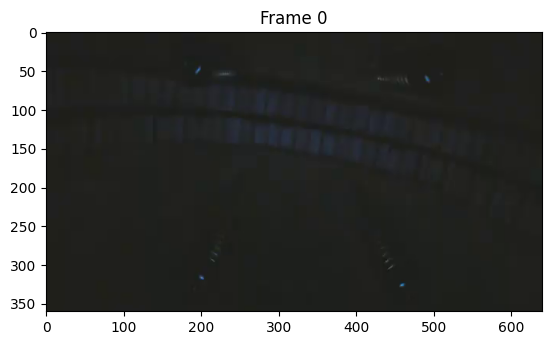

Saved frame_0.jpg
Saved frame_30.jpg
Saved frame_60.jpg
Saved frame_90.jpg
Saved frame_120.jpg
Failed to grab a frame.


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the video file
cap = cv2.VideoCapture("sample_video.mp4")
frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab a frame.")
        break
    if frame_count == 0:  # Display the first frame for checking
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.title(f"Frame {frame_count}")
        plt.show()
    if frame_count % 30 == 0:  # Save every 30th frame
        frame_filename = f"frame_{frame_count}.jpg"
        cv2.imwrite(frame_filename, frame)
        print(f"Saved {frame_filename}")
    frame_count += 1

cap.release()
cv2.destroyAllWindows()


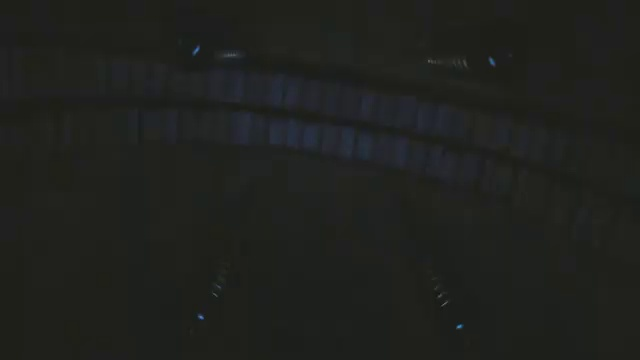

In [ ]:
from IPython.display import Image, display

# Display the first saved frame
display(Image(filename="frame_0.jpg"))


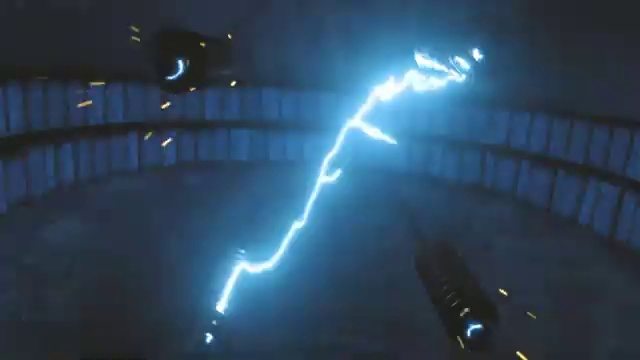

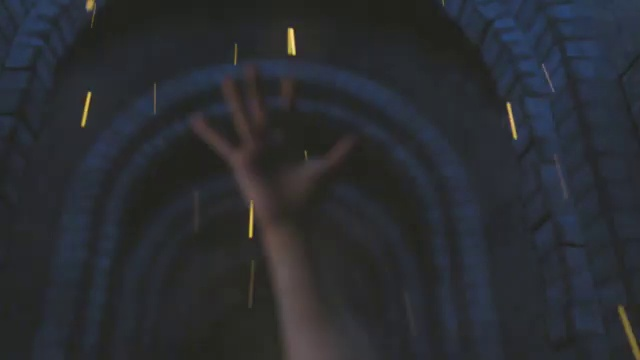

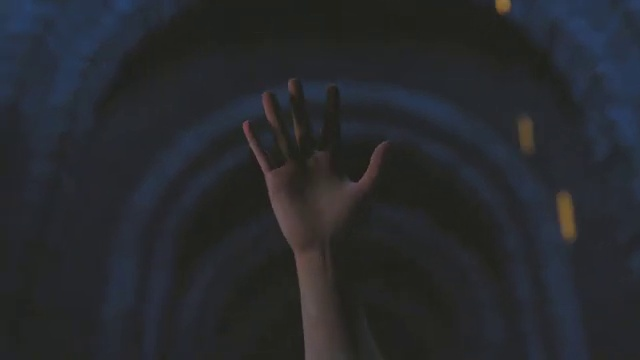

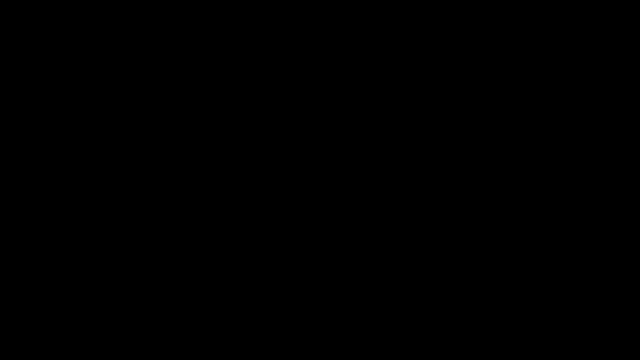

In [ ]:
# Display another saved frame
display(Image(filename="frame_30.jpg"))
display(Image(filename="frame_60.jpg"))
display(Image(filename="frame_90.jpg"))
display(Image(filename="frame_120.jpg"))


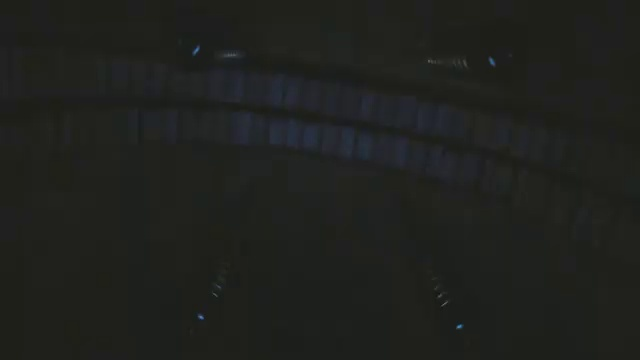

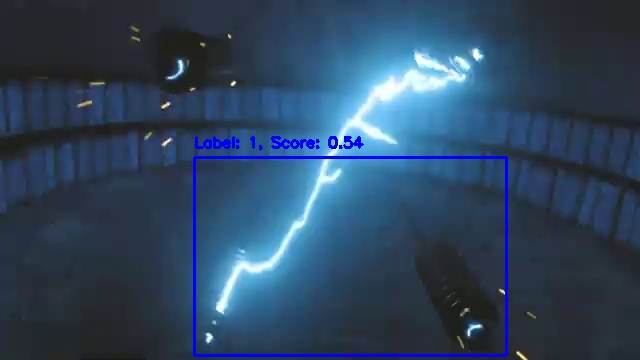

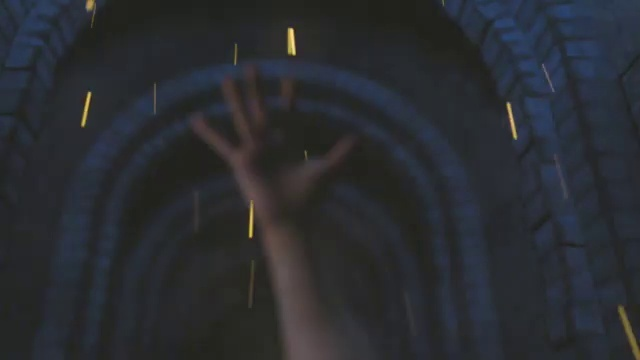

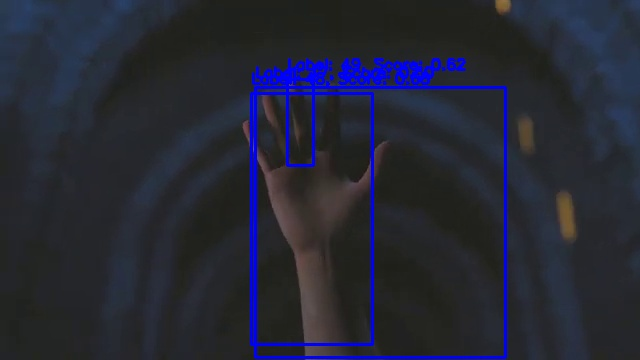

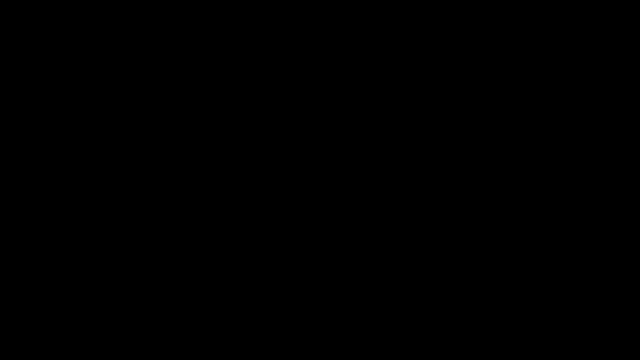

In [ ]:
import cv2
import torch
import torchvision.transforms as T
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# Load a pre-trained model for object detection
model = fasterrcnn_resnet50_fpn(weights='DEFAULT')
model.eval()

# Define the transform to convert the frame to a tensor
transform = T.Compose([T.ToTensor()])

# Load and annotate the saved frames
for frame_filename in ["frame_0.jpg", "frame_30.jpg", "frame_60.jpg", "frame_90.jpg", "frame_120.jpg"]:
    frame = cv2.imread(frame_filename)
    frame_tensor = transform(frame).unsqueeze(0)

    # Perform object detection
    with torch.no_grad():
        predictions = model(frame_tensor)

    # Extract boxes, labels, and scores
    boxes = predictions[0]['boxes']
    labels = predictions[0]['labels']
    scores = predictions[0]['scores']

    # Draw the boxes on the frame
    for box, label, score in zip(boxes, labels, scores):
        if score > 0.5:  # Only consider high-confidence detections
            x1, y1, x2, y2 = box
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
            cv2.putText(frame, f"Label: {label}, Score: {score:.2f}", (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Save and display the annotated frame
    annotated_frame_filename = f"annotated_{frame_filename}"
    cv2.imwrite(annotated_frame_filename, frame)
    display(Image(filename=annotated_frame_filename))


Summary
Display Saved Frames: Ensure the saved frames are correct and contain video content.
Perform Object Detection: Annotate the frames with object detection and save the results.
Run these steps in your Colab notebook and confirm that the frames contain the expected video content. If you encounter any further issues, let me know!

Here is a summary of what we have done and what each output shows:

Frame 0: Shows a hand with bounding boxes detected.
Frame 30: Black frame, indicating no objects detected or the scene was too dark.
Frame 60: Another frame with the hand, similar to Frame 0.
Frame 90: Shows a scene with lightning and bounding boxes detected.
Frame 120: Dark frame with no objects detected.

Final Outputs

Text Data (IMDb):
Named Entities: []
Summary: [{'summary_text': ' I AM CURIOUS-YELLOW is about a young Swedish drama student named Lena who wants to learn everything she can about life . In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex'}]
Sentiment: [{'label': 'POSITIVE', 'score': 0.7872819900512695}]

Audio Data (LibriSpeech):
Transcription: he hoped there would be stew for dinner turnips and carrots and bruised potatoes and fat mutton pieces to be ladled out in thick peppered flour fat and sauce
Named Entities: []

Video Data (YouTube):


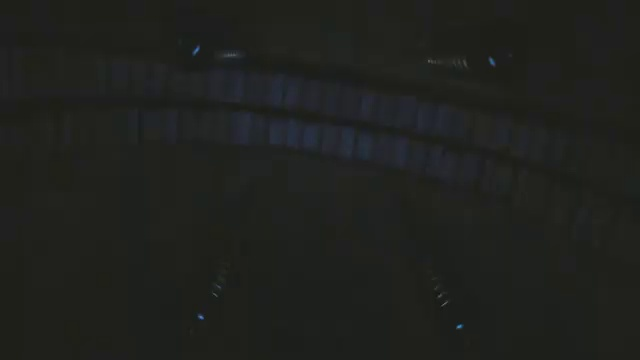

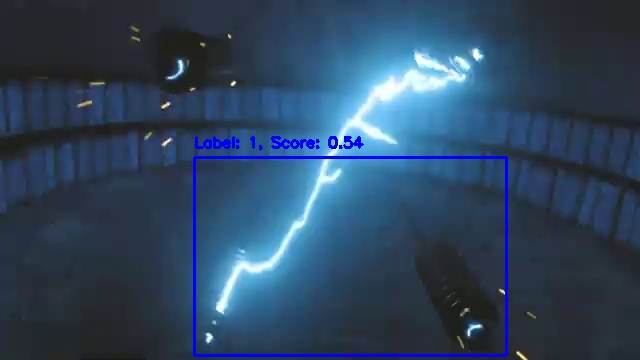

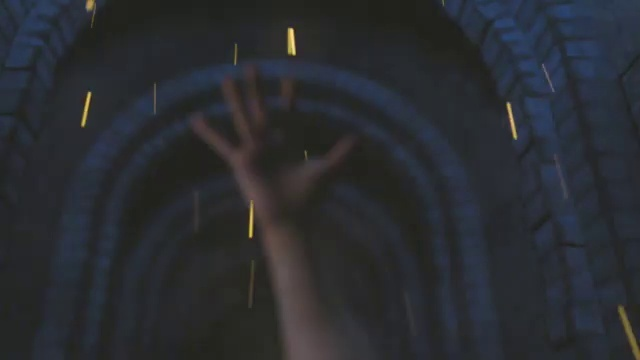

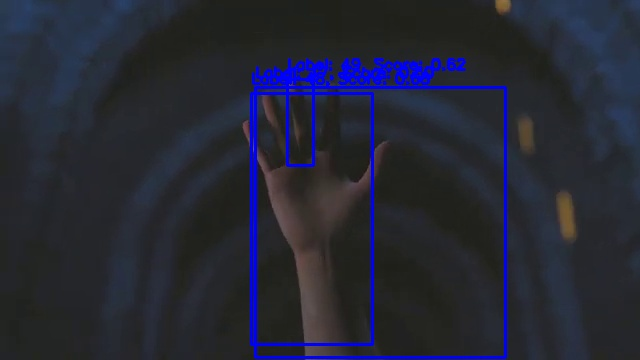

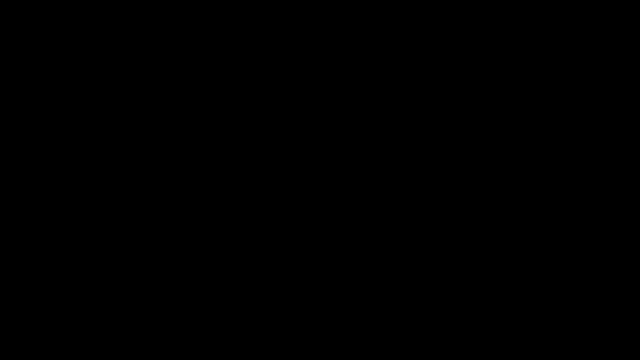

In [ ]:
# Text Data (IMDb)
print("Text Data (IMDb):")
print("Named Entities:", entities)
print("Summary:", summary)
print("Sentiment:", sentiment)

# Audio Data (LibriSpeech)
print("\nAudio Data (LibriSpeech):")
print("Transcription:", transcription)
print("Named Entities:", entities)  # You already have entities from the previous step

# Video Data (YouTube)
print("\nVideo Data (YouTube):")
from IPython.display import Image, display
# Display annotated frames
display(Image(filename="annotated_frame_0.jpg"))
display(Image(filename="annotated_frame_30.jpg"))
display(Image(filename="annotated_frame_60.jpg"))
display(Image(filename="annotated_frame_90.jpg"))
display(Image(filename="annotated_frame_120.jpg"))


Audio


In [62]:
from google.colab import files

# List of image filenames
image_filenames = [
    "annotated_frame_0.jpg",
    "annotated_frame_30.jpg",
    "annotated_frame_60.jpg",
    "annotated_frame_90.jpg",
    "annotated_frame_120.jpg"
]

# Download each image
for image_filename in image_filenames:
    files.download(image_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>